In [16]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [17]:
# Importation des données
# Convertion  dela variable Date au format datetime 

In [18]:
store_train = pd.read_csv('Data/Store_train.csv')
store_train = store_train.drop("Unnamed: 0", axis = 1)
store_train.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,année,mois,jour,jr sem
370893,1115,4,2,5350.0,9.0,2013.0,1,22.0,2012.0,2,...,510,1,1,0,0,653505,2014,5,19,0
370894,1115,4,2,5350.0,9.0,2013.0,1,22.0,2012.0,2,...,437,1,0,0,0,762344,2014,5,17,5
370895,1115,4,2,5350.0,9.0,2013.0,1,22.0,2012.0,2,...,364,1,0,0,0,726976,2014,5,16,4
370896,1115,4,2,5350.0,9.0,2013.0,1,22.0,2012.0,2,...,343,1,0,0,0,815028,2014,5,15,3
370897,1115,4,2,5350.0,9.0,2013.0,1,22.0,2012.0,2,...,308,1,0,0,0,491898,2014,5,14,2


In [19]:
store_train.Promo.unique()

array([1, 0], dtype=int64)

In [26]:
#Afficher les ventes par jour sur l'année 2014
store_train_2014 = store_train[store_train['année'] == 2014]
store_train_2014
sales_2014_per_day = store_train_2014.groupby(['Date'] , as_index = False).agg({'Sales':'sum'})

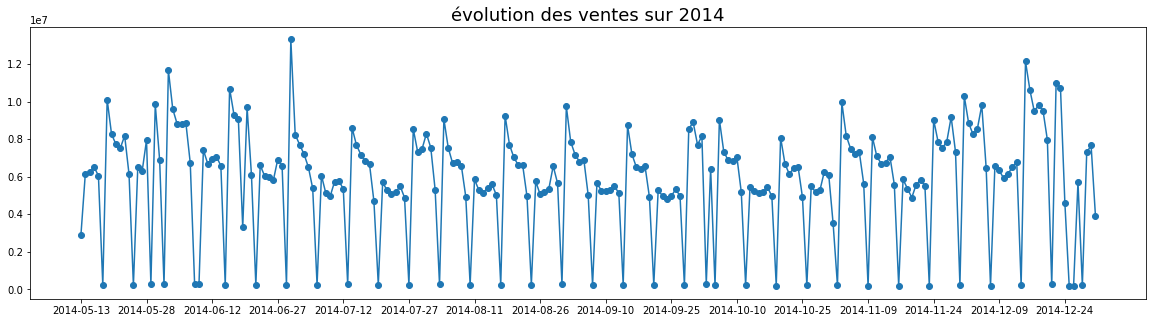

In [27]:
plt.figure(figsize = (20,5))
plt.title('évolution des ventes sur 2014', fontsize=18)
plt.plot_date(x = sales_2014_per_day['Date'].values, y = sales_2014_per_day['Sales'].values, xdate = True, ls = '-');
plt.xticks(np.arange(0,len(sales_2014_per_day.Date), 15))
plt.show()

Les ventes sur l'année 2014 au global présentent un schéma répétitif avec une poussée des ventes quotidiennes le week end

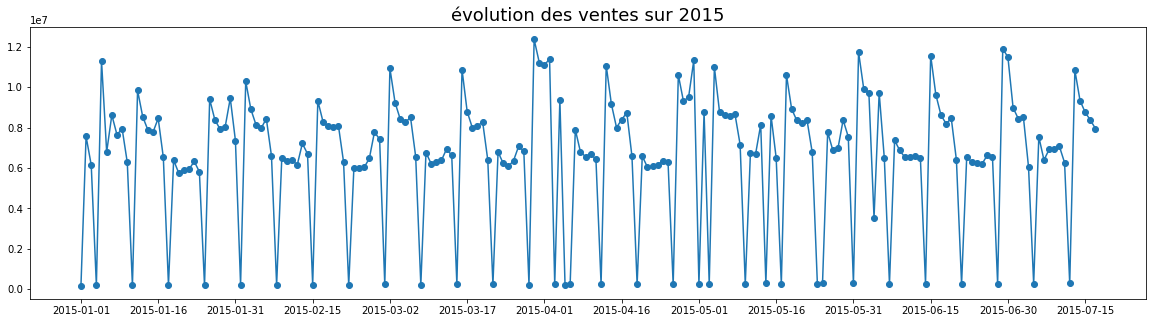

In [30]:
#Afficher les ventes par jour sur l'année 2015

store_train_2015 = store_train[store_train['année'] == 2015]
sales_2015_per_day = store_train_2015.groupby(['Date'] , as_index = False).agg({'Sales':'sum'})

plt.figure(figsize = (20,5))
plt.title('évolution des ventes sur 2015', fontsize=18)
plt.plot_date(x = sales_2015_per_day['Date'].values, y = sales_2015_per_day['Sales'].values, xdate = True, ls = '-');
plt.xticks(np.arange(0,len(sales_2015_per_day.Date), 15))
plt.show()

Les ventes sur l'année 2015 au global présentent un schéma répétitif avec aussi une poussée des ventes quotidiennes le week end
Nous allons également regarder la distribution des variables Sales et Customers à l'aide d'une boîte à moustache. 

Nous allons également regarder la distribution des variables Sales et Customers à l'aide d'une boîte à moustache. 

In [31]:
sales_per_day = store_train.groupby(['Date'] , as_index = False).agg({'Sales':'sum','Customers':'sum'})
sales_per_day.head()

,Date,Sales,Customers
0,2014-05-13,2896254,351766
1,2014-05-14,6141038,744235
2,2014-05-15,6252912,759575
3,2014-05-16,6515173,784919
4,2014-05-17,6052688,700008


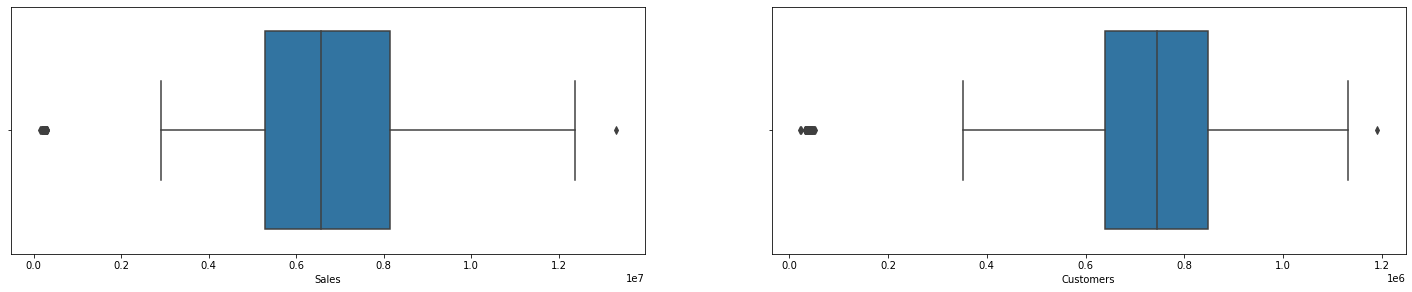

In [32]:
plt.figure(figsize = (25,10))
plt.subplot(221)
sns.boxplot(x = 'Sales', data = sales_per_day);
plt.subplot(222)
sns.boxplot(x = 'Customers', data = sales_per_day);

Les médianes de Sales et Customers se situentrespectivement autour de 6000000 et 7500000. Les deux présentent les mêmes profils :
très peu de valeurs au-delà de semblerait que nous ayons quelques magasins qui se démarquent avec des grosses ventes
et attirent plus de clients que les autres.

Observer et quantifier la relation linéaire entre les deux variables à l'aide du test de corrélation de pearson

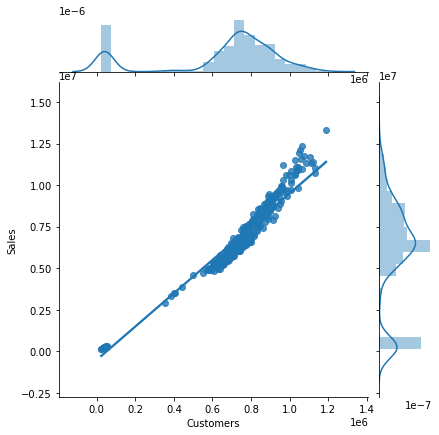

In [33]:
sns.jointplot("Customers", "Sales", data=sales_per_day, kind='reg')

On observe une relation linéaire entre les deux variables.  Nous remarquons également une distributions particulières
de Sales et Customers avec des valeurs basses puis un creux et de nouveau des valeurs. Cela fait référence à ce que  nous avons potentiellement un groupe atypique de magasins avec des chiffres plus faible que les autres. 

Nous allons donc quantifier cette relation par la corelation de pearson

In [34]:
from scipy.stats import pearsonr
pd.DataFrame(pearsonr(sales_per_day['Sales'],sales_per_day['Customers']), index = ['pearson_coeff','p-value'], columns = ['resultat_test'])

,resultat_test
pearson_coeff,9.840831e-01
p-value,9.881313e-324


Comme nous y attendons, le nombre de clients par jours est fortement lié à la vente.

Maitenant nous allons nous interessé à la vente par jour de chaque magasin par plot_date ,pour confirmer cette intuition.

In [92]:
# Nous allons étudier les ventes sur l'années 2014


agg_store= store_train_2014.groupby(['Store'], as_index = False).agg(
    {'Sales':'sum','Customers':'sum','Promo':'sum','CompetitionDistance':'unique'})

agg_store = agg_store.sort_values(by = 'Sales', ascending = False)

agg_store

,Store,Sales,Customers,Promo,CompetitionDistance
261,262,4858073,801601,90,[1180.0]
561,562,4168662,721575,90,[1210.0]
816,817,4130224,586898,89,[140.0]
1113,1114,4071990,634396,89,[870.0]
250,251,3714273,482559,88,[340.0]
...,...,...,...,...,...
572,573,154950,12659,15,[1190.0]
1048,1049,149749,23964,15,[370.0]
878,879,145138,13353,15,[75860.0]
262,263,144768,14149,15,[1140.0]


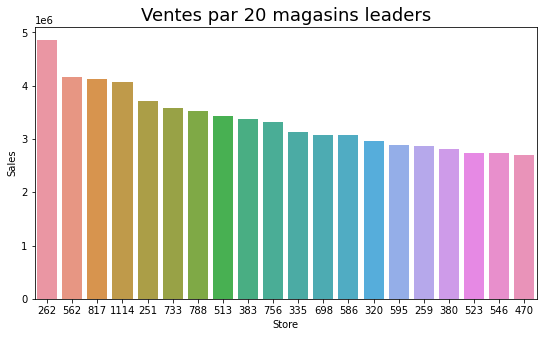

In [36]:
plt.figure(figsize = (9,5))
plt.title('Ventes par 20 magasins leaders',fontsize=18)

sns.barplot(x = 'Store', y = 'Sales', order = agg_store['Store'].head(20).values, data = agg_store.head(20));


Les magasins les plus vendeurs sont 262, 562,1114, et 817

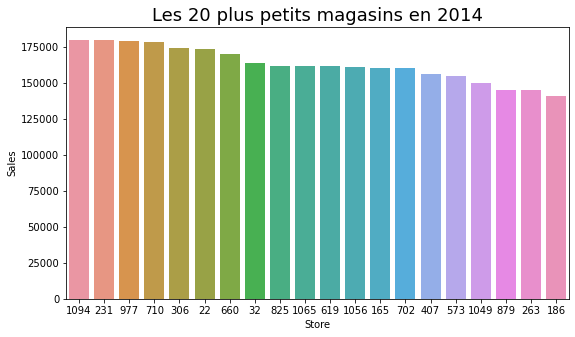

In [37]:
plt.figure(figsize = (9,5))
plt.title('Les 20 plus petits magasins en 2014',fontsize=18)

sns.barplot(x = 'Store', y = 'Sales', order = agg_store['Store'].tail(20).values, data = agg_store.tail(20));

De même les magasins les moins vendeurs sont  le 186, 263 et 879

In [38]:
# nous allons calculer le pourcentage de ventes des 20plus gros magasins et des 20 plus petits magasins
vente_lead = 0

for i in agg_store["Store"].head(20).values:

    sale = agg_store[agg_store['Store']==i]['Sales'].sum()

    vente_lead += sale


vente_less = 0

for i in agg_store["Store"].tail(20).values:

    sale = agg_store[agg_store['Store']==i]['Sales'].sum()

    vente_less += sale

In [39]:
print('Pourcentage des ventes des 20 plus gros magasins en 2014:',vente_lead/agg_store.Sales.sum()*100,'%')

print('Pourcentage des ventes des 20 plus petits magasins en  2014:',vente_less/agg_store.Sales.sum()*100,'%')

Pourcentage des ventes des 20 plus gros magasins en 2014: 4.99068737242772 %
Pourcentage des ventes des 20 plus petits magasins en  2014: 0.24190128518551476 %


Nous allons créer une variable cat_sales sur les 20 plus gros magasins L'objectif est de voir si dans les magasins il y a plutôt un grand nombre de petites ventes ou bien de grosses ventes. Cela nous permettra de déduire si le consommateur qui se rend dans le magasin privilégie plutôt de gros ou petits achats. Suivant l'un ou l'autre, le type de clientèle et donc les produits proposés ne sont pas les mêmes.

In [40]:
agg_store_lead = agg_store.iloc[0:20,:]
agg_store_lead.shape

(20, 5)

In [41]:
borne_inf = int(round(agg_store_lead ['Sales'].min()))

borne_sup = int(round(agg_store_lead ['Sales'].max()))

longueur = int(round((borne_sup - borne_inf)/7))

agg_store_lead['cat_Sales'] = pd.cut(
    agg_store_lead['Sales'], bins = np.arange(max(0,borne_inf - longueur),borne_sup + longueur,longueur),include_lowest=True)


In [42]:
agg_store_lead

,Store,Sales,Customers,Promo,CompetitionDistance,cat_Sales
261,262,4858073,801601,90,[1180.0],"(4550434.0, 4858073.0]"
561,562,4168662,721575,90,[1210.0],"(3935156.0, 4242795.0]"
816,817,4130224,586898,89,[140.0],"(3935156.0, 4242795.0]"
1113,1114,4071990,634396,89,[870.0],"(3935156.0, 4242795.0]"
250,251,3714273,482559,88,[340.0],"(3627517.0, 3935156.0]"
732,733,3571591,809539,90,[860.0],"(3319878.0, 3627517.0]"
787,788,3530585,334573,89,[1530.0],"(3319878.0, 3627517.0]"
512,513,3428680,395118,89,[400.0],"(3319878.0, 3627517.0]"
382,383,3365708,423603,88,[350.0],"(3319878.0, 3627517.0]"
755,756,3323845,469443,88,[50.0],"(3319878.0, 3627517.0]"


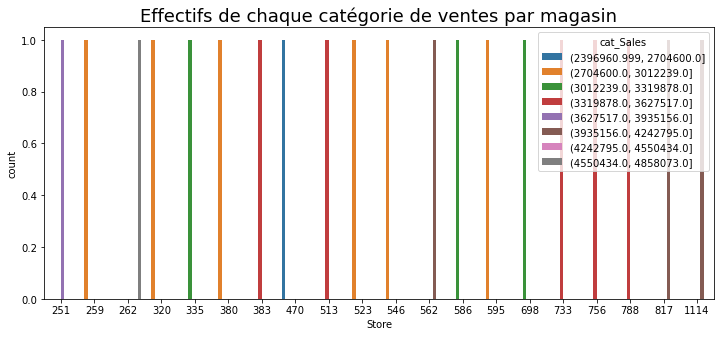

In [43]:
plt.figure(figsize = (12,5))

plt.title('Effectifs de chaque catégorie de ventes par magasin',fontsize=18)
sns.countplot(x = 'Store', hue = 'cat_Sales', data = agg_store_lead);

Parmis les magasins qui font le plus de ventes, le magasin leader affiche des ventes entres 4550434 et 4858073

Nous allons regarder la fréquentation des magasins. Pour visualiser rapidement quels sont les
magasins qui attirent le plus de clients 

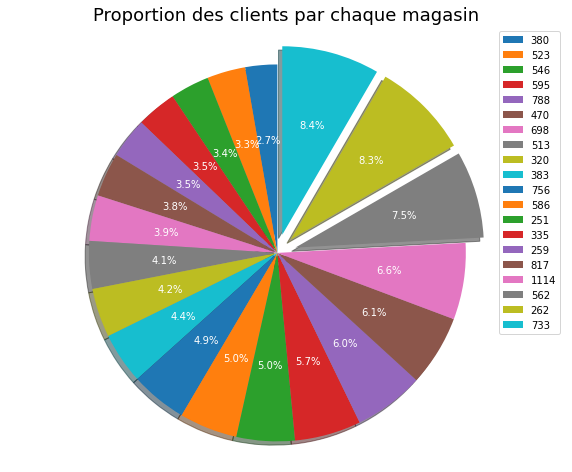

In [44]:
agg_store_lead = agg_store_lead.sort_values(by = 'Customers', ascending = True)


plt.figure(figsize=(10,8))

explode = np.zeros(17).tolist()

explode.extend([0.1,0.1,0.1])



plt.pie(agg_store_lead['Customers'],labels=agg_store_lead['Store'],explode = explode, autopct='%1.1f%%',

        shadow=True, startangle=90,textprops=dict(color="w"))

plt.axis('equal')

plt.title('Proportion des clients par chaque magasin',fontsize=18)

plt.legend(loc="best");

Les magasins de tête le 262, 733 et 562 attirent à eux 3,
 23% des clients sur 2014.Ces magasins font partir de celles qui affichent plus de ventes

In [50]:
# Regardons maintement la fréquentation des lus petits magasins

agg_store_less = agg_store.tail(20)
agg_store_less.head()

,Store,Sales,Customers,Promo,CompetitionDistance
1093,1094,179792,14894,15,[2380.0]
230,231,179774,15026,15,[3840.0]
976,977,179047,19316,15,[520.0]
709,710,178245,14571,15,[1500.0]
305,306,173989,18652,15,[5100.0]


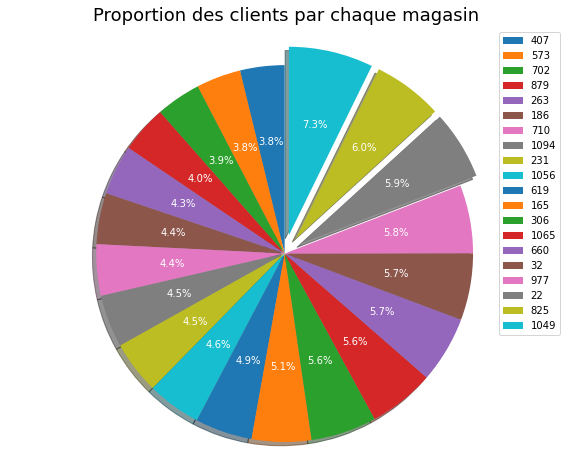

In [51]:
agg_store_less = agg_store_less.sort_values(by = 'Customers', ascending = True)


plt.figure(figsize=(10,8))

explode = np.zeros(17).tolist()

explode.extend([0.1,0.1,0.1])



plt.pie(agg_store_less['Customers'],labels=agg_store_less['Store'],explode = explode, autopct='%1.1f%%',

        shadow=True, startangle=90,textprops=dict(color="w"))

plt.axis('equal')

plt.title('Proportion des clients par chaque magasin',fontsize=18)

plt.legend(loc="best");

les magasins les ùmoins fréquentés sont le 407, 573, 702 (11.5 %)

In [52]:
borne_inf = int(round(agg_store_less['Customers'].min()))

borne_sup = int(round(agg_store_less['Customers'].max()))

longueur = int(round((borne_sup - borne_inf)/7))

agg_store_less['cat_Customers'] = pd.cut(agg_store_less['Customers'], bins = np.arange(max(0,borne_inf - longueur),borne_sup + longueur,longueur),include_lowest=True)

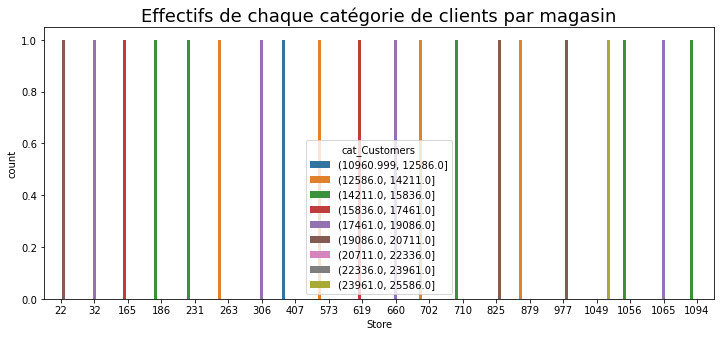

In [53]:
plt.figure(figsize = (12,5))

plt.title('Effectifs de chaque catégorie de clients par magasin',fontsize=18)

sns.countplot(x = 'Store', hue = 'cat_Customers', data = agg_store_less);

Les plus petits magasins ont une journées de faibles affluences

Pour également juger de l'efficacité de chaque type de magasin on peut regarder la performance. 
Il s'agit de regarder le rapport entre les ventes totales et le nombre de clients par type de magasin.
Cela nous donnera une idée du montant dépensé en moyenne par client.

In [54]:
agg_StoreType = sales_2014.groupby(['StoreType'], as_index = False).sum()

agg_StoreType['performance'] = agg_StoreType['Sales']/agg_StoreType['Customers']


In [55]:
agg_StoreType

,StoreType,Store,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Open,Promo,StateHoliday,SchoolHoliday,Id,année,mois,jour,jr sem,performance
0,1,58046848,81188,571429750.0,797203.0,207949182.0,43768,963104.0,208084195.0,28308,...,103456,46998,85,25880,52436386960,208360384,887729,1682389,257662,8.725064
1,2,2123229,2372,4085410.0,29039.0,7576090.0,980,24196.0,7581187.0,331,...,3769,1456,162,872,1933256350,7590766,32587,61531,11275,5.100760
2,3,15988744,25766,91602840.0,197967.0,52942510.0,12366,258504.0,52982030.0,10565,...,26343,12040,23,6622,13397663007,53054802,227018,427182,65380,8.564009
3,4,29098164,71794,408163340.0,441728.0,110010478.0,29061,647943.0,110056958.0,19532,...,54718,24778,34,13720,27811731936,110202052,465221,892492,136065,11.231741


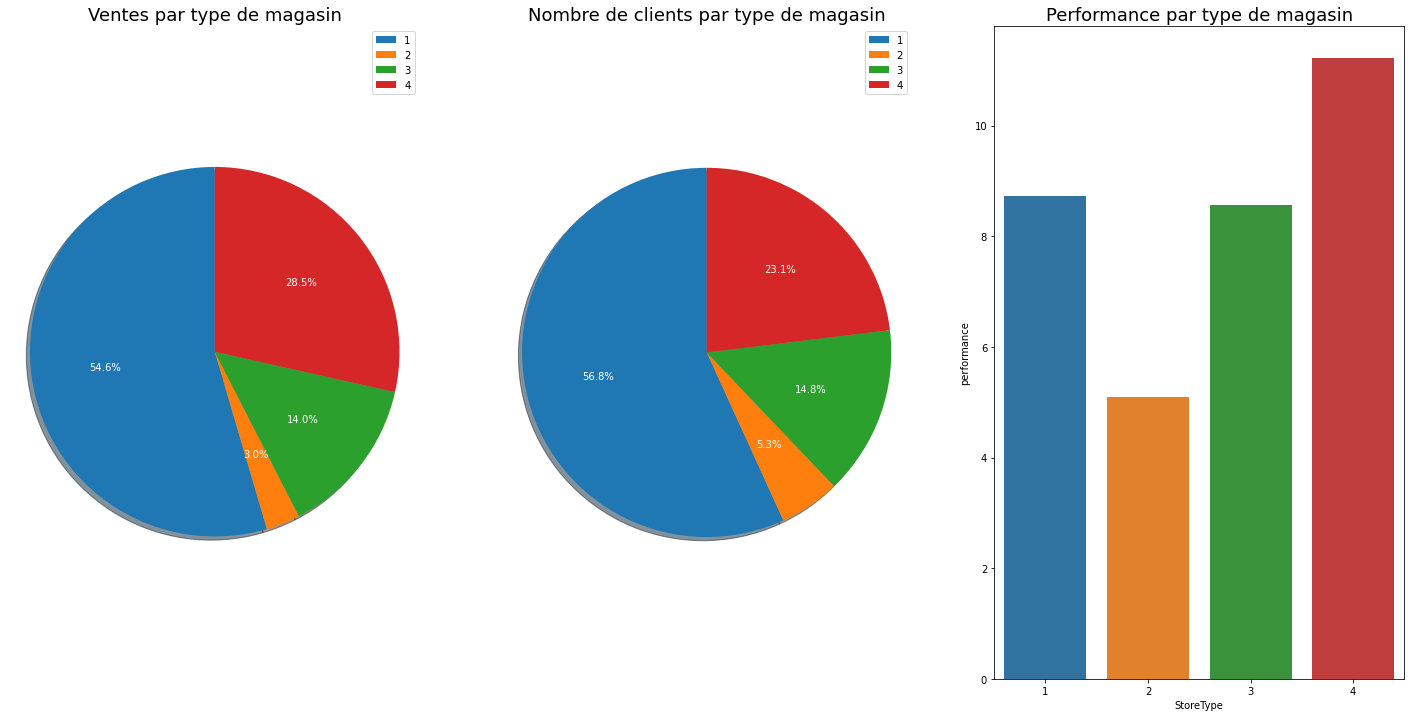

In [56]:
fig1, ax1 = plt.subplots(1,3,figsize=(25,12))

ax1[0].pie(agg_StoreType['Sales'].values,labels=agg_StoreType['StoreType'].values, autopct='%1.1f%%',

            shadow=True, startangle=90,textprops=dict(color="w"))

ax1[0].axis('equal')

ax1[0].set_title('Ventes par type de magasin',fontsize=18)

ax1[0].legend(loc="best");


ax1[1].pie(agg_StoreType['Customers'].values,labels=agg_StoreType['StoreType'].values, autopct='%1.1f%%',

            shadow=True, startangle=90,textprops=dict(color="w"))

ax1[1].axis('equal')

ax1[1].set_title('Nombre de clients par type de magasin',fontsize=18)

ax1[1].legend(loc="best");



ax1[2] = sns.barplot(x = 'StoreType', y = 'performance', data = agg_StoreType)

ax1[2].set_title('Performance par type de magasin',fontsize=18);


Le type 1 présentant les plus grosses ventes présentent également le plus grand nombre de clients. Cela vient de la
forte relation linéaire entre Sales et Customers. Cependant si on parle en termes de performance le type a n'arrive
qu'en troisième position. C'est toujours le même dilemme : faire du volume avec le risque de dégrader la performance contre
cibler des clientèles particulières ce qui limite le volume mais améliore la performance

Maintenant que nous savons quels sont les magasins moteur en termes de ventes et clients,il s'agit de déterminer leur 
efficacité. C'est à dire que quand le client pénètre dans le magasin achète-t-il pour un montant élevé de produits ? 

In [57]:
#  Il s'agira ici d'utiliser le prncipe de performance,et de faire le rapport entre montant_total_des_ventes et nombre_total_de_clients

agg_store_lead['performance'] = agg_store_lead['Sales']/agg_store_lead['Customers']

agg_store_lead = agg_store_lead.sort_values(by= 'performance', ascending = True)

In [58]:
agg_store_lead

,Store,Sales,Customers,Promo,CompetitionDistance,cat_Sales,performance
732,733,3571591,809539,90,[860.0],"(3319878.0, 3627517.0]",4.411883
258,259,2866962,580788,90,[210.0],"(2704600.0, 3012239.0]",4.936331
334,335,3136181,549950,90,[90.0],"(3012239.0, 3319878.0]",5.702666
561,562,4168662,721575,90,[1210.0],"(3935156.0, 4242795.0]",5.777171
261,262,4858073,801601,90,[1180.0],"(4550434.0, 4858073.0]",6.060463
585,586,3073913,481228,88,[250.0],"(3012239.0, 3319878.0]",6.387644
1113,1114,4071990,634396,89,[870.0],"(3935156.0, 4242795.0]",6.418688
816,817,4130224,586898,89,[140.0],"(3935156.0, 4242795.0]",7.037380
755,756,3323845,469443,88,[50.0],"(3319878.0, 3627517.0]",7.080402
319,320,2966611,406114,89,[210.0],"(2704600.0, 3012239.0]",7.304873


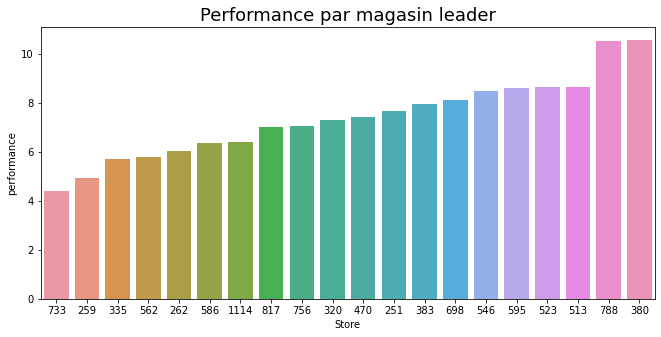

In [59]:
agg_store_lead['performance'] = agg_store_lead['Sales']/agg_store['Customers']

plt.figure(figsize = (11,5))

plt.title('Performance par magasin leader',fontsize=18)

sns.barplot(x = 'Store', y = 'performance', order = agg_store_lead['Store'], data = agg_store_lead);

On remarque que les magasins de tête certes , ils font plus de ventes et de clients cependant le panier de ventes par client est moins
élevé que dans d'autres magasins. On tient une piste d'amélioration : les clients viennent et achètent mais pas
suffisamment relativement aux autres magasins. On peut encore augmenter le potentiel de ventes de ces 3 magasins.

Nous allons nous interessé à la stratégie promo mise en place dans les magasins.

In [63]:
agg_store_lead.sort_values(by= 'Promo', ascending = True)

,Store,Sales,Customers,Promo,CompetitionDistance,cat_Sales,performance
379,380,2808544,265400,88,[2240.0],"(2704600.0, 3012239.0]",10.582306
585,586,3073913,481228,88,[250.0],"(3012239.0, 3319878.0]",6.387644
382,383,3365708,423603,88,[350.0],"(3319878.0, 3627517.0]",7.945430
755,756,3323845,469443,88,[50.0],"(3319878.0, 3627517.0]",7.080402
250,251,3714273,482559,88,[340.0],"(3627517.0, 3935156.0]",7.697034
469,470,2704600,363461,88,[50.0],"(2396960.999, 2704600.0]",7.441239
512,513,3428680,395118,89,[400.0],"(3319878.0, 3627517.0]",8.677610
522,523,2745618,317715,89,[50.0],"(2704600.0, 3012239.0]",8.641764
594,595,2879547,333398,89,[1130.0],"(2704600.0, 3012239.0]",8.636965
545,546,2745548,323628,89,[580.0],"(2704600.0, 3012239.0]",8.483654


Presque le même nombre de promos pour tous les magasins, il n'y a pas de personnalisation au cas par cas en tout cas pas sur le nombre. 

In [80]:
agg_store_less

,Store,Sales,Customers,Promo,CompetitionDistance,cat_Customers
406,407,156072,12586,15,[5890.0],"(10960.999, 12586.0]"
572,573,154950,12659,15,[1190.0],"(12586.0, 14211.0]"
701,702,160104,12744,15,[8550.0],"(12586.0, 14211.0]"
878,879,145138,13353,15,[75860.0],"(12586.0, 14211.0]"
262,263,144768,14149,15,[1140.0],"(12586.0, 14211.0]"
185,186,140669,14501,15,[290.0],"(14211.0, 15836.0]"
709,710,178245,14571,15,[1500.0],"(14211.0, 15836.0]"
1093,1094,179792,14894,15,[2380.0],"(14211.0, 15836.0]"
230,231,179774,15026,15,[3840.0],"(14211.0, 15836.0]"
1055,1056,160818,15270,15,[5350.0],"(14211.0, 15836.0]"


Même constat pour les magasins les moins vendeurs

Regardons par magasin si elles ont un impact sur le volume des ventes et le panier individuel d'un client. Comparer la performance pour chaque magasin en période de promotions ou non est idéal. Pour voir une évolution il est judicieux d'utiliser un histogramme dans lequel, pour chaque magasin, nous présenterons la performance en période de réductions ou non.

In [106]:
store_train_2014
agg_promo = store_train_2014.groupby(['Store','Promo'], as_index = False).agg({'Sales':'sum','Customers':'sum'})

agg_promo['performance'] = agg_promo['Sales']/agg_promo['Customers']
agg_promo = agg_promo.sort_values(by = 'Sales', ascending= False)
agg_promo_leader = agg_promo.head(20)
agg_promo_leader


,Store,Promo,Sales,Customers,performance
522,262,0,3001270,502203,5.976209
1122,562,0,2383363,425830,5.596982
1633,817,1,2178258,297021,7.333683
1464,733,0,2100199,482827,4.349796
2226,1114,0,2092889,340444,6.147528
2227,1114,1,1979101,293952,6.732735
1632,817,0,1951966,289877,6.733773
501,251,1,1892734,233282,8.113502
523,262,1,1856803,299398,6.201788
1575,788,1,1823099,168628,10.811366


<Figure size 504x360 with 0 Axes>

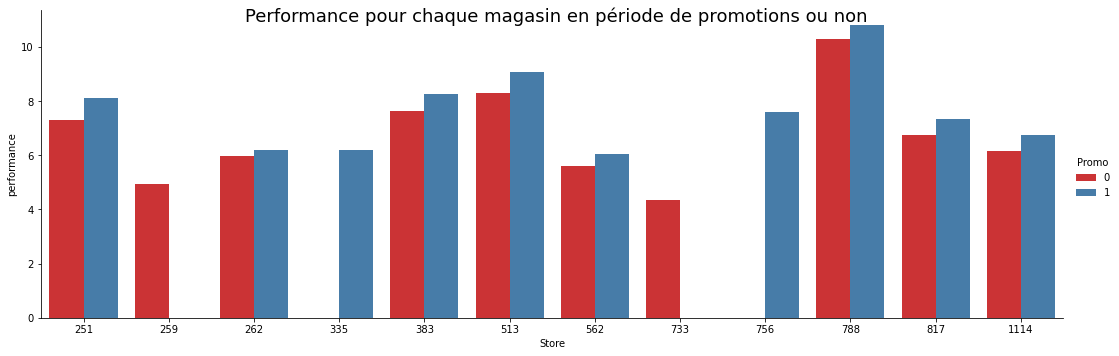

In [120]:
plt.figure(figsize = (7,5))

sns.catplot(x = 'Store', y = 'performance', hue = 'Promo', kind = 'bar', height = 5, aspect = 3, palette = 'Set1', data = agg_promo_leader).fig.suptitle('Performance pour chaque magasin en période de promotions ou non',fontsize=18);

Nous avons une tendance assez bizard mais les promotions on l'ere de fonctionner

In [ ]:
agg_assortment = store_train.groupby(['Assortment','Promo'], as_index = False).agg({'Sales':['mean','sum'],'Customers':['mean','sum']})

agg_assortment['performance'] = agg_assortiment[('Sales','sum')]/agg_[('Customers','sum')]



sns.catplot(x = 'Assortment', y = ('Sales','mean'), hue = 'Promo', data = agg_assortment, kind = 'bar').fig.suptitle('Vente',fontsize=15);

sns.catplot(x = 'Assortment', y = 'performance', hue = 'Promo', kind = 'bar', data = agg_assortment).fig.suptitle('Performance',fontsize=15);